In [13]:
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple seaborn
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple lib-pybroker

%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple numpy



Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pybroker
from pybroker import Strategy,StrategyConfig,YFinance
pybroker.enable_data_source_cache('my_strategy')

In [3]:
config=StrategyConfig(initial_cash=500_000)
strategy=Strategy(YFinance(),"3/1/2017","3/1/2022",config)

In [4]:
from pybroker import ExecContext
def buy_low(ctx:ExecContext):
    if ctx.long_pos():
        return;
    if ctx.bars>2 and ctx.close[-1]<ctx.low[-2]:
        ctx.buy_shares=ctx.calc_target_shares(0.25)
        ctx.buy_limit_price=ctx.close[-1]-0.01
        ctx.hold_bars=3

In [5]:
def short_high(ctx:ExecContext):
    if ctx.short_pos():
        return
    if ctx.bars>2 and ctx.close[-1]>ctx.high[-2]:
        ctx.sell_shares=100
        ctx.hold_bars=2

In [6]:
strategy.add_execution(buy_low,["AAPL","MSFT"])

In [7]:
strategy.add_execution(short_high,["TSLA"])

In [10]:
result=strategy.backtest()

Backtesting: 2017-03-01 00:00:00 to 2022-03-01 00:00:00

Loading bar data...


[*********************100%***********************]  3 of 3 completed

Loaded bar data: 0:00:02 

Test split: 2017-03-01 00:00:00 to 2022-02-28 00:00:00



  0% (0 of 1259) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  4% (51 of 1259) |                      | Elapsed Time: 0:00:00 ETA:   0:00:01
  9% (121 of 1259) |##                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 15% (201 of 1259) |###                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 20% (261 of 1259) |####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (341 of 1259) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 33% (421 of 1259) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 37% (471 of 1259) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 43% (551 of 1259) |#########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 50% (631 of 1259) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 56% (711 of 1259) |###########          | Elapsed Time: 0:00:00 ETA:   0:00:00
 61% (771 of 1259) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 68% (861 of 1259) |##############     


Finished backtest: 0:00:10


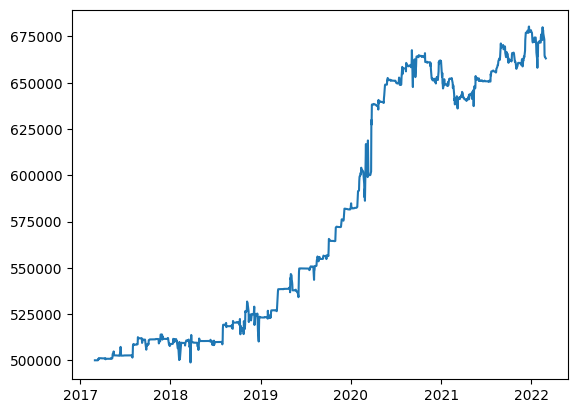

In [11]:
import matplotlib.pyplot as plt

chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])


In [14]:
import plot_utils
df=plot_utils.plotResult(result)
result_dict = df.set_index('zh_name')['value'].to_dict()
# 打印结果
print(result_dict)

{'交易次数': 387.0, '初始市值': 500000.0, '期末市值': 663159.56, '总盈亏': 163980.89, '未实现盈亏': -821.3299999999581, '总回报率': 32.79617800000001, '总盈利': 399649.13, '总亏损': -235668.24000000002, '总手续费': 0.0, '最大回撤（现金）': -31525.679999999935, '最大回撤（百分比）': -4.722197715089793, '胜率': 52.4547803617571, '亏损率': 47.54521963824289, '盈利交易次数': 203.0, '亏损交易次数': 184.0, '每笔交易平均盈亏': 423.72322997416023, '每笔交易平均回报率': 0.27744186046511626, '每笔交易平均K线数': 2.41343669250646, '每笔交易平均盈利': 1968.7149261083744, '每笔交易平均盈利率': 3.178817733990148, '盈利交易的平均K线数': 2.4630541871921183, '每笔交易平均亏损': -1280.8056521739131, '每笔交易平均亏损率': -2.9235326086956523, '亏损交易的平均K线数': 2.358695652173913, '最大盈利交易': 20909.83, '最大盈利交易（百分比）': 14.49, '最大盈利交易的K线数': 3.0, '最大亏损交易': -10951.86, '最大亏损交易（百分比）': -6.49, '最大亏损交易的K线数': 3.0, '最大连续盈利交易次数': 7.0, '最大连续亏损交易次数': 7.0, '夏普比率': 0.054741832344651103, '索提诺比率': 0.06138280873687203, '盈亏比': 1.3147716162360321, '溃疡指数': 0.659121451489451, '溃疡表现指数': 0.03528570182142998, '净值R²': 0.902272767841872, '标准误差': 65631.39330095443}


In [15]:
result_dict

{'交易次数': 387.0,
 '初始市值': 500000.0,
 '期末市值': 663159.56,
 '总盈亏': 163980.89,
 '未实现盈亏': -821.3299999999581,
 '总回报率': 32.79617800000001,
 '总盈利': 399649.13,
 '总亏损': -235668.24000000002,
 '总手续费': 0.0,
 '最大回撤（现金）': -31525.679999999935,
 '最大回撤（百分比）': -4.722197715089793,
 '胜率': 52.4547803617571,
 '亏损率': 47.54521963824289,
 '盈利交易次数': 203.0,
 '亏损交易次数': 184.0,
 '每笔交易平均盈亏': 423.72322997416023,
 '每笔交易平均回报率': 0.27744186046511626,
 '每笔交易平均K线数': 2.41343669250646,
 '每笔交易平均盈利': 1968.7149261083744,
 '每笔交易平均盈利率': 3.178817733990148,
 '盈利交易的平均K线数': 2.4630541871921183,
 '每笔交易平均亏损': -1280.8056521739131,
 '每笔交易平均亏损率': -2.9235326086956523,
 '亏损交易的平均K线数': 2.358695652173913,
 '最大盈利交易': 20909.83,
 '最大盈利交易（百分比）': 14.49,
 '最大盈利交易的K线数': 3.0,
 '最大亏损交易': -10951.86,
 '最大亏损交易（百分比）': -6.49,
 '最大亏损交易的K线数': 3.0,
 '最大连续盈利交易次数': 7.0,
 '最大连续亏损交易次数': 7.0,
 '夏普比率': 0.054741832344651103,
 '索提诺比率': 0.06138280873687203,
 '盈亏比': 1.3147716162360321,
 '溃疡指数': 0.659121451489451,
 '溃疡表现指数': 0.03528570182142998,
 '净值R²': 0.902272767841872,